# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import the XGBoost function for classification
import xgboost
from xgboost import XGBClassifier
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

# 2. Check how many records do we have


In [3]:
df=pd.read_excel('GermanCredit.xlsx')
df.head(3)

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12


# 3. Plot Histogram for column 'CreditAmount'

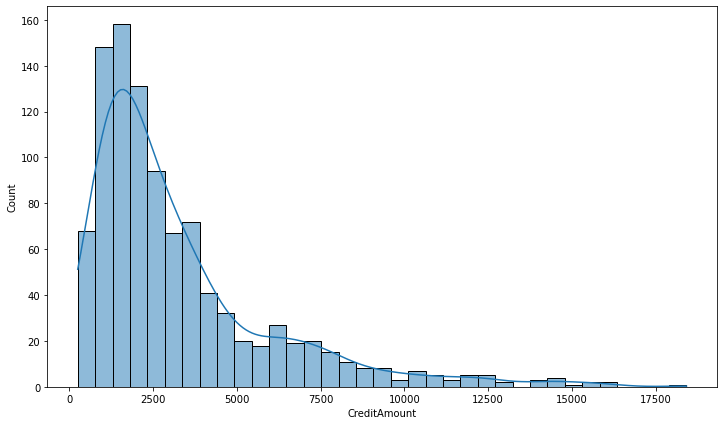

In [6]:
# Histogram
plt.figure(figsize=(12,7))
sns.histplot(df['CreditAmount'],kde=True)
plt.show()

# 3b. Create creditability dataframe

In [14]:
# One Hot Encoding

df=pd.get_dummies(columns=['Creditability'],data=df)

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [15]:
df.head(2)

,CreditAmount,DurationOfCreditInMonths,Creditability_0,Creditability_1
0,1049,18,0,1
1,2799,9,0,1


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

<AxesSubplot:xlabel='Creditability_0', ylabel='Creditability_1'>

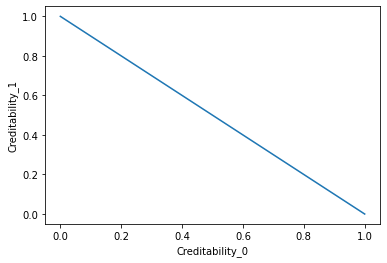

In [17]:
sns.lineplot(x=df['Creditability_0'],y=df['Creditability_1'])

# 6. Prepare input data for the model

In [19]:
df.drop(columns=['Creditability_0'],inplace=True)

In [26]:
df.head(1)

,CreditAmount,DurationOfCreditInMonths,Creditability_1
0,1049,18,1


# 7. Fit logistic regression model

In [28]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Creditability_1']),df['Creditability_1'],test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 2)
(300, 2)
(700,)
(300,)


In [29]:
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

In [30]:
logreg=sm.Logit(y_train,x_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 3.421785
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        Creditability_1   No. Observations:                  700
Model:                          Logit   Df Residuals:                      697
Method:                           MLE   Df Model:                            2
Date:                Fri, 22 Jul 2022   Pseudo R-squ.:                     inf
Time:                        22:05:23   Log-Likelihood:                -2395.2
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.7109      0.175      9.776      0.000       1.368

# 8. Test accuracy calculation

In [32]:
y_pred=logreg.predict(x_test)
y_pred_prob=[0 if i<0.5 else 1 for i in y_pred]
print(classification_report(y_test,y_pred_prob))

              precision    recall  f1-score   support

           0       0.48      0.11      0.18        91
           1       0.71      0.95      0.81       209

    accuracy                           0.69       300
   macro avg       0.59      0.53      0.50       300
weighted avg       0.64      0.69      0.62       300



# 9. Build a confusion matrix

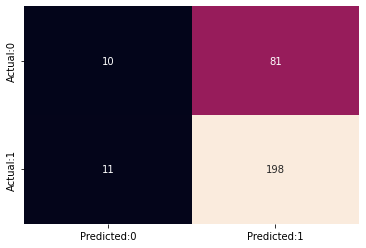

In [34]:
# Confusion Matrix.
cm=confusion_matrix(y_test,y_pred_prob)
matrix=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(matrix,annot=True,fmt='d',cbar=False)
plt.show()

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

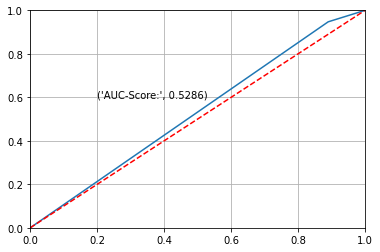

In [41]:
# ROC-CURVE

fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.2,y=0.6,s=('AUC-Score:',round(metrics.roc_auc_score(y_test,y_pred_prob),4)))
plt.grid(True)

In [3]:
np.array([[150,20],[10,100]])

array([[150,  20],
       [ 10, 100]])